In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from numpy.random import uniform
import random
from KMEANS import kmeans
from Visualization import visualization, interactive_visualization

In [2]:
df = pd.read_csv('wine-clustering.csv')

In [3]:
#Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#Normalizing the data so that the data approximately follows a Gaussian distribution
df_normalized = normalize(df_scaled)

In [4]:
#Converting the numpy array into a pandas DataFrame
df_normalized = pd.DataFrame(df_normalized)
#Renaming the columns
df_normalized.columns = df.columns
pd.reset_option('display.max_rows')
df_normalized

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.379613,-0.140548,0.058007,-0.292368,0.478426,0.202228,0.258678,-0.164873,0.306189,0.062923,0.090535,0.461931,0.253226
1,0.072771,-0.147561,-0.244647,-0.735967,0.005361,0.168017,0.216764,-0.242497,-0.160948,-0.086667,0.119975,0.328989,0.285198
2,0.059268,0.006391,0.333952,-0.080900,0.026599,0.243539,0.365922,-0.150039,0.643007,0.080985,0.095822,0.237395,0.419993
3,0.348418,-0.071435,0.100501,-0.166686,0.191747,0.513178,0.302069,-0.202243,0.212599,0.244301,-0.088064,0.243890,0.480866
4,0.110835,0.085345,0.689824,0.169399,0.480516,0.303230,0.248639,0.085008,0.150455,-0.119672,0.135752,0.168520,-0.014196
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.195143,0.662421,0.067958,0.067211,-0.074141,-0.219493,-0.317320,0.283785,-0.207148,0.254500,-0.310162,-0.274185,-0.004889
174,0.151189,0.432907,0.127125,0.322553,0.048596,-0.243124,-0.393599,0.168279,-0.097132,0.297199,-0.346151,-0.455228,0.003032
175,0.076851,0.402951,-0.089922,0.035026,0.328507,-0.260934,-0.310533,0.126817,-0.097479,0.513690,-0.372322,-0.343065,0.064799
176,0.054369,0.059166,0.003308,0.039409,0.369612,-0.268602,-0.351997,0.352066,-0.059595,0.476803,-0.407509,-0.363970,0.077045


In [5]:
k = 3
data = df_normalized.values
clusters, centroids = kmeans(data, k)

In [6]:
# Calculate metrics
ch_index = calinski_harabasz_score(df_normalized, clusters)
silhouette_avg = silhouette_score(df_normalized, clusters)
db_index = davies_bouldin_score(df_normalized, clusters)

print("Silhouette Score:", silhouette_avg)
print("Calinski Harabasz Score:", ch_index)
print("Davies Bouldin Index:", db_index)

Silhouette Score: 0.30041839946925103
Calinski Harabasz Score: 76.52647786907596
Davies Bouldin Index: 1.3537403284160916


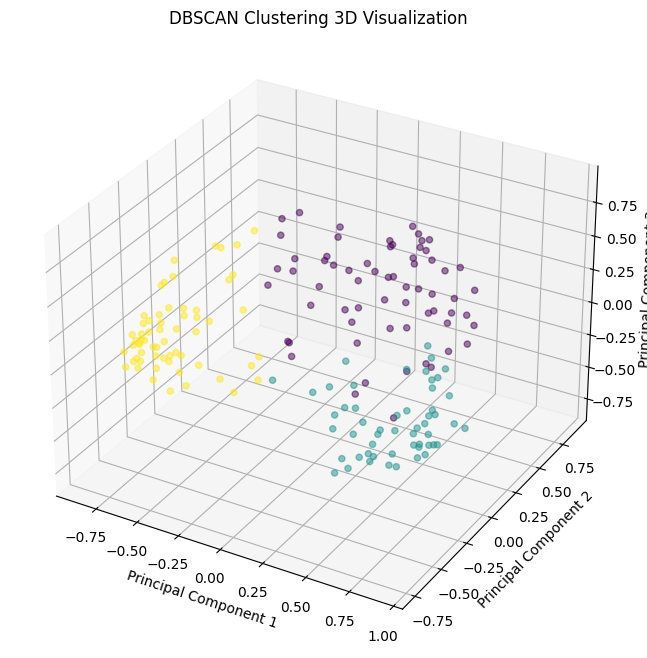

In [7]:
visualization(df_normalized, clusters)

In [8]:
interactive_visualization(df_normalized, clusters)

In [9]:
print(clusters.tolist().count(1))

53
